# Problem Statement


Classify the description of E-commerce products into 4 categories by implementing any NLP approach for analysis and modeling on the provided dataset. The objective is to recognize whether the given description is related to Electronics (0), Households (1), Books (2), or Clothing & Accessories (3) products. Focus majorly on unique preprocessing techniques.

### Importing all the necessary libraries

In [148]:
# Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import seaborn as sns

### Data Dictionary:

Category : Refers to the category of products based on their description [Electronics, Households, Books, Clothing & Accessories]

Text : Description of a product

In [149]:
# Loading the dataset

Ecom = pd.read_csv("ecommerceDataset.csv/ecommerceDataset.csv")

In [150]:
# Checking the first 5 rows of the dataset
Ecom.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


Since the first row is coming as a column name, we need to add column names to the dataset

In [151]:
# Adding columns to the data frame
colnames = ['Category','Text']
Ecom = pd.read_csv("ecommerceDataset.csv/ecommerceDataset.csv",names=colnames, header=None)

In [152]:
# Checking the first 5 rows of the dataset
Ecom.head()

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [153]:
#Check for the info of the data set
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  50425 non-null  object
 1   Text      50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [154]:
#Descriptive summary of the data
Ecom.describe()

,Category,Text
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


#### Observation:
• Both columns are of string data type

• There are 50425 products overall, divided into 4 distinct groups.

• A significant majority of the items are of the household kind.

• There is one missing value in Text column


#### Checking for presence of null values

In [155]:
Ecom.isnull().sum()

#Inference : Text contains 1 value

Category    0
Text        1
dtype: int64

In [156]:
#Missing entry
Ecom[Ecom['Text'].isnull()]

,Category,Text
39330,Clothing & Accessories,NaN


Since there is only one missing value, we can remove it

In [157]:
Ecom.dropna(inplace=True)

In [158]:
# The null row has been removed
Ecom.isnull().sum()

Category    0
Text        0
dtype: int64

#### Checking for duplicate rows

In [159]:
duplicate_records=Ecom.duplicated()

print('Number of duplicate rows= %d' % (duplicate_records.sum()))

Ecom[duplicate_records].head()

Number of duplicate rows= 22622


,Category,Text
7,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
11,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
12,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
16,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
20,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


In [160]:
print('{}% of the entries are duplicate'.format((duplicate_records.sum()/len(Ecom['Text']))*100))

44.863557036331905% of the entries are duplicate


All the duplicate rows can be removed as they do not contribute much to the model's true performance.

In [161]:
print('Before removing the duplicate rows',Ecom.shape)
Ecom.drop_duplicates(inplace=True) 
print('After removing the duplicate rows',Ecom.shape)

Before removing the duplicate rows (50424, 2)
After removing the duplicate rows (27802, 2)


#### Exploratory data analysis

In [162]:
#Checking the unique values of category column
Ecom['Category'].value_counts()

Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: Category, dtype: int64

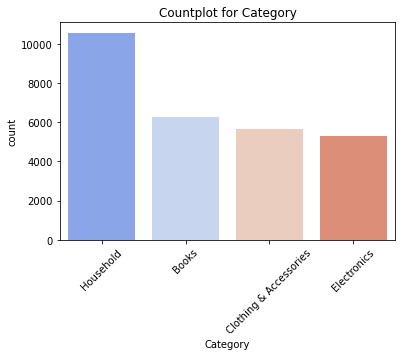

In [163]:
# plotting Countplot for Cut
labels = Ecom.Category.value_counts(normalize=True).index
plt.title('Countplot for Category')
sns.countplot(data=Ecom,x=Ecom['Category'],palette='coolwarm',order=labels)
plt.xticks(rotation=45)
plt.show()

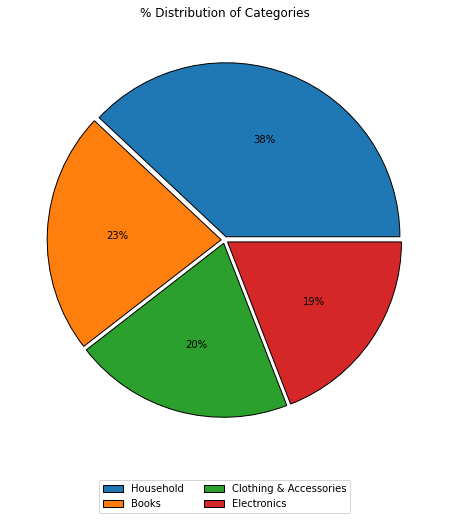

In [164]:
values = Ecom.Category.value_counts(normalize=True).values
labels = Ecom.Category.value_counts(normalize=True).index
#colors = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

plt.figure(figsize=(10,8))
plt.pie(x= values,explode=[0.02,0.02,0.02,0.02],autopct='%1.0f%%',wedgeprops=
       {'edgecolor':'black'})
plt.title('% Distribution of Categories')
plt.legend(labels=labels, loc='upper center', 
           bbox_to_anchor=(0.5,-0.04), ncol=2)
plt.show()

#### Observation

We can observe that household items are around twice as many as each of the following categories: electronics, books, clothing, and accessories.

### Basic Exploration in Text Mining

#### Total words in each product's description

In [165]:
# Checking for total no of words in each product's description
df = Ecom.copy()
df['Total_Words'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,Category,Text,Total_Words
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,228
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",59
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,331
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",291
4,Household,Incredible Gifts India Wooden Happy Birthday U...,186


In [166]:
df.groupby(by='Category').mean()['Total_Words']

Category
Books                     143.800192
Clothing & Accessories     73.543179
Electronics               137.624341
Household                 112.365013
Name: Total_Words, dtype: float64

Inference:

Clothing category description contains lesser words than the other 3

#### Total characters in each product's description

In [167]:
#Checking for total no of characters including white spaces in each product's description
df['Total_Characters'] = df['Text'].str.len()
df.head()

,Category,Text,Total_Words,Total_Characters
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,228,1338
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",59,346
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,331,1316
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",291,1091
4,Household,Incredible Gifts India Wooden Happy Birthday U...,186,989


#### Average word length of each product description

In [168]:
#Checking for the average word length of each product description
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

df['Avg_Word_Length'] = df['Text'].apply(lambda x: avg_word(str(x)))
df.head()

,Category,Text,Total_Words,Total_Characters,Avg_Word_Length
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,228,1338,4.872807
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",59,346,4.881356
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,331,1316,4.392857
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",291,1091,4.342391
4,Household,Incredible Gifts India Wooden Happy Birthday U...,186,989,4.369565


#### Total number of stop words in each description

In [169]:
#Checking for number of stop words in each product description
from nltk.corpus import stopwords
stop = stopwords.words()

df['Stopwords'] = df['Text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df.head()

,Category,Text,Total_Words,Total_Characters,Avg_Word_Length,Stopwords
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,228,1338,4.872807,97
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",59,346,4.881356,19
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,331,1316,4.392857,100
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",291,1091,4.342391,84
4,Household,Incredible Gifts India Wooden Happy Birthday U...,186,989,4.369565,0


#### Total number of numeric characters in each description

In [170]:
df['Numerics'] = df['Text'].apply(lambda x: len(re.findall(r'[0-9]',x)))
df.head()

,Category,Text,Total_Words,Total_Characters,Avg_Word_Length,Stopwords,Numerics
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,228,1338,4.872807,97,8
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",59,346,4.881356,19,7
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,331,1316,4.392857,100,11
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",291,1091,4.342391,84,15
4,Household,Incredible Gifts India Wooden Happy Birthday U...,186,989,4.369565,0,4


In [171]:
#Descriptive summary of the newly obtained insights
df.describe()

,Total_Words,Total_Characters,Avg_Word_Length,Stopwords,Numerics
count,27802.000000,27802.000000,27802.000000,27802.000000,27802.000000
mean,116.338105,699.994928,5.341076,35.733329,10.424106
std,169.523543,1023.019517,0.831845,73.236536,19.589397
min,1.000000,4.000000,2.500000,0.000000,0.000000
25%,35.000000,215.000000,4.888889,4.000000,1.000000
50%,78.000000,473.000000,5.218750,20.000000,5.000000
75%,154.000000,916.750000,5.621046,46.000000,12.000000
max,8183.000000,50403.000000,32.782609,3870.000000,574.000000


In [172]:
#Grouped descriptive summary of the newly obtained insights
df.groupby(by='Category')['Total_Words'].describe().T

Category,Books,Clothing & Accessories,Electronics,Household
count,6256.000000,5674.000000,5308.000000,10564.000000
mean,143.800192,73.543179,137.624341,112.365013
std,299.883311,64.313936,129.589855,100.255161
min,1.000000,1.000000,2.000000,1.000000
25%,13.000000,31.000000,44.000000,45.000000
50%,75.000000,57.000000,104.000000,87.000000
75%,171.000000,92.000000,201.000000,152.000000
max,8183.000000,582.000000,2002.000000,1797.000000


In [173]:
#Seeing those descriptions which containins only one word
df[(df['Total_Words']==1)][['Category','Text']]

,Category,Text
19034,Household,Sourcery
20442,Books,Panorama
25314,Books,Yes!
25918,Books,Sail
27423,Books,Becoming
30140,Books,Calculus
30707,Books,Psychopathology
30738,Books,Psychotherapy
31225,Clothing & Accessories,BELT


In [174]:
#Seeing those descriptions which containins less than 3 words
df[(df['Total_Words']<3)][['Category','Text']]

,Category,Text
19034,Household,Sourcery
19841,Books,fault lines
19903,Books,Universe
20442,Books,Panorama
20982,Books,#Horror
21254,Books,Ramayana
21642,Books,Environment
22685,Books,Undercoating Gun
22907,Books,Dracula
23015,Books,Essays


Inference:

A single word product description does not given much information on the product and hence we are removing these rows

We can also see that, products which contains less more than one word are actually significant and related to the product, eg.name of the book, category of the book, name of the clothing or electronic items.

For our purpose, we are removing those with only one word in the description.

In [175]:
#deleting rows which has only one word in Text column
Ecom.drop(df[df['Total_Words']==1].index , inplace=True)
Ecom.shape

(27793, 2)

In [176]:
Ecom.reset_index(drop=True,inplace=True)
Ecom.head()

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


#### Pre-Processing

#### Lower case conversion

In [177]:
#Converting all the characters into lower case
Ecom['Text'] = Ecom['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Ecom.head()

,Category,Text
0,Household,paper plane design framed wall hanging motivat...
1,Household,"saf 'floral' framed painting (wood, 30 inch x ..."
2,Household,saf 'uv textured modern art print framed' pain...
3,Household,"saf flower print framed painting (synthetic, 1..."
4,Household,incredible gifts india wooden happy birthday u...


#### Removal of characters other than alphanumeric and white space

In [178]:
Ecom['Text'] = Ecom['Text'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Ecom['Text'].head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_29332/1910482328.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Ecom['Text'] = Ecom['Text'].str.replace('[^\w\s]','')


0    paper plane design framed wall hanging motivat...
1    saf floral framed painting wood 30 inch x 10 i...
2    saf uv textured modern art print framed painti...
3    saf flower print framed painting synthetic 135...
4    incredible gifts india wooden happy birthday u...
Name: Text, dtype: object

#### Removal of numeric characters

In [179]:
#Numbers present in description are not significant enough to give detailed insights, hence we can remove them
Ecom['Text'] = Ecom['Text'].str.replace('[\d]','')
#\d: Returns a match where the string contains digits (numbers from 0-9)
Ecom['Text'].head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_29332/493634516.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Ecom['Text'] = Ecom['Text'].str.replace('[\d]','')


0    paper plane design framed wall hanging motivat...
1    saf floral framed painting wood  inch x  inch ...
2    saf uv textured modern art print framed painti...
3    saf flower print framed painting synthetic  in...
4    incredible gifts india wooden happy birthday u...
Name: Text, dtype: object

#### Removal of Accented characters

In [180]:
# Remove Accented Chars
import unicodedata
def remove_accented_char(sentence):
    sentence = unicodedata.normalize('NFKD', sentence).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return sentence

In [181]:
Ecom['Text'] = Ecom['Text'].apply(lambda x: remove_accented_char(x))
Ecom

,Category,Text
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood inch x inch ...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic in...
4,Household,incredible gifts india wooden happy birthday u...
...,...,...
27788,Electronics,micromax bharat plus zero impact on visual di...
27789,Electronics,microsoft lumia gb g black microsoft lumia e...
27790,Electronics,microsoft lumia black gb colourblack product ...
27791,Electronics,karbonn titanium wind w white karbonn titanium...


#### Removal of stop words

In [182]:
from nltk.corpus import stopwords

In [183]:
Ecom['Text'] = Ecom['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Ecom['Text'].head()

0    paper plane design framed wall hanging motivat...
1    saf floral framed painting wood inch x inch sp...
2    saf uv textured modern art print framed painti...
3    saf flower print framed painting synthetic inc...
4    incredible gifts india wooden happy birthday u...
Name: Text, dtype: object

In [184]:
#Getting the words which have high frequency, also mean they are commonly used across all categories
#As these words are common, we remove them
common_words = pd.Series(' '.join(Ecom['Text']).split()).value_counts()[:]
common_words

x                9076
set              6524
book             6278
size             6239
quality          6146
                 ... 
abysmal             1
insensitivity       1
doctorskavita       1
krishnan            1
everyonegood        1
Length: 95441, dtype: int64

#### Removal of common words

Words having x does not carry any significance

Words like product, use, set, size, also, one, made can be removed as they are common to all products and do not carry any meaning in their classification

In [185]:
#Removing the 10 most common words
Ecom['Text'] = Ecom['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words[:10]))
Ecom['Text'].head()

0    paper plane framed wall hanging motivational o...
1    saf floral framed painting wood inch inch spec...
2    saf uv textured modern art print framed painti...
3    saf flower print framed painting synthetic inc...
4    incredible gifts india wooden happy birthday u...
Name: Text, dtype: object

#### Removal of rare words

In [186]:
rare_words = pd.Series(' '.join(Ecom['Text']).split()).value_counts()[:]
rare_words
## As it is difficult to analyse if these words will have association in text analytics or not, 
## hence to start with, these words are removed from the dataset

author          5016
cotton          4845
black           4840
high            4824
color           4518
                ... 
mondo              1
outshines          1
jacobi             1
depthjacobi        1
everyonegood       1
Length: 95431, dtype: int64

In [187]:
#picking those words which occurred only once
rare_words = rare_words[rare_words==1]
rare_words

constantine     1
spacetible      1
afforable       1
xplay           1
earthly         1
               ..
mondo           1
outshines       1
jacobi          1
depthjacobi     1
everyonegood    1
Length: 48707, dtype: int64

In [188]:
#As it is difficult to make out if these words will have association in text analytics or not, hence to start with these words are kept in the dataset
#Since the number of words which have occurred only once are very large in number, we are not gonna remove them

#### Stemming the data set

#### removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

Since the data set is huge, we are performing stemming else lemmatiztion could be used

In [189]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Ecom['Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        paper plane frame wall hang motiv offic decor ...
1        saf floral frame paint wood inch inch special ...
2        saf uv textur modern art print frame paint syn...
3        saf flower print frame paint synthet inch inch...
4        incred gift india wooden happi birthday uniqu ...
                               ...                        
27788    micromax bharat zero impact visual displayscra...
27789    microsoft lumia gb g black microsoft lumia exp...
27790    microsoft lumia black gb colourblack descript ...
27791    karbonn titanium wind w white karbonn titanium...
27792    nokia lumia dual sim grey colourgrey descript ...
Name: Text, Length: 27793, dtype: object

In [309]:
#Copying all the document into a new variable
#Or in other words getting X, independent variable
processed_features = Ecom.iloc[:, 1].values

#Copying all the terms into a new variable
#Or in other words getting Y, dependent variable
labels = Ecom.iloc[:, 0].values

In [310]:
labels

array(['Household', 'Household', 'Household', ..., 'Electronics',
       'Electronics', 'Electronics'], dtype=object)

In [311]:
processed_features

array(['paper plane framed wall hanging motivational office decor art prints inch painting synthetic frame uv textured print effects attracts special series paintings makes wall beautiful royal touch painting ready hang proud possess unique painting niche modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular prints highest lifetime print solely topnotch inks achieve brilliant colours due high level uv resistance prints retain beautiful colours years add colour style living space digitally printed painting pleasure eternal blissso bring elegant print lushed rich colors makes sheer elegance friends familyit treasured forever lucky recipient liven place intriguing paintings high definition hd graphic digital prints office room',
       'saf floral framed painting wood inch inch special effect uv print textured sao painting synthetic frame uv textured print effects attracts special series paintings m

#### TfidfVectorizer

In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000,min_df=10, max_df=5000, ngram_range=(1,2))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [313]:
vectorizer

TfidfVectorizer(max_df=5000, max_features=10000, min_df=10, ngram_range=(1, 2))

In [314]:
## Extra Knowledge Bytes (TF-IDF)

# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa batteries,aaa,aaa batteries,aart,aart store,abaya,abc,abdomen,ability,...,zip,zip closure,zipper,zippered,zippers,zone,zoom,zoom lens,zoook,zoook rocker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).shape

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(27793, 10000)

#### Train-Test split

In [316]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [317]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Gaussian Naive Bayes Model

In [318]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


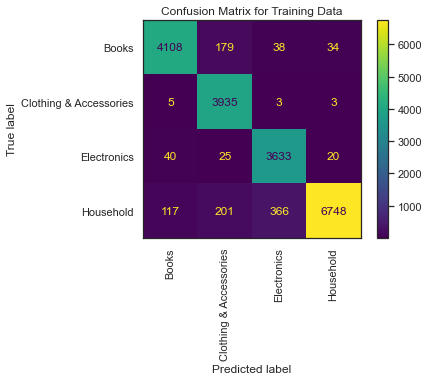

In [319]:
sns.set(style="white")
plot_confusion_matrix(NB_model,X_train,Y_train);
plt.title('Confusion Matrix for Training Data')
plt.xticks(rotation=90)
plt.show()

In [320]:
Y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, Y_train)                      ## Accuracy
print('The accuracy of the training model {} \n'.format(model_score)) 
print(metrics.classification_report(Y_train, Y_train_predict))     ## classification_report

The accuracy of the training model 0.947005911076844 

                        precision    recall  f1-score   support

                 Books       0.96      0.94      0.95      4359
Clothing & Accessories       0.91      1.00      0.95      3946
           Electronics       0.90      0.98      0.94      3718
             Household       0.99      0.91      0.95      7432

              accuracy                           0.95     19455
             macro avg       0.94      0.96      0.95     19455
          weighted avg       0.95      0.95      0.95     19455



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


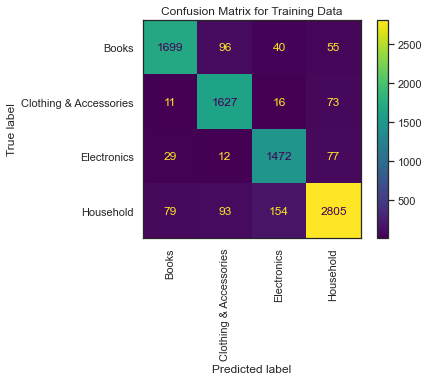

In [321]:
sns.set(style="white")
plot_confusion_matrix(NB_model,X_test,Y_test);
plt.title('Confusion Matrix for Training Data')
plt.xticks(rotation=90)
plt.show()

In [322]:
## Performance Matrix on test data set
Y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, Y_test)                    ## Accuracy
print('The accuracy of the test model {} \n'.format(model_score)) 
print(metrics.classification_report(Y_test, Y_test_predict))    ## classification_report

The accuracy of the test model 0.9118493643559606 

                        precision    recall  f1-score   support

                 Books       0.93      0.90      0.92      1890
Clothing & Accessories       0.89      0.94      0.92      1727
           Electronics       0.88      0.93      0.90      1590
             Household       0.93      0.90      0.91      3131

              accuracy                           0.91      8338
             macro avg       0.91      0.92      0.91      8338
          weighted avg       0.91      0.91      0.91      8338



### Random Forest

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [342]:
param_grid_rfcl = {
    'max_depth': [7],
    'max_features': [166],
    'min_samples_leaf': [15],
    'min_samples_split': [50],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl= GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl,cv=5)

In [343]:
grid_search_rfcl.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7], 'max_features': [166],
                         'min_samples_leaf': [15], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [344]:
print(grid_search_rfcl.best_params_)

{'max_depth': 7, 'max_features': 166, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 100}


In [345]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=7, max_features=166, min_samples_leaf=15,
                       min_samples_split=50, random_state=1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


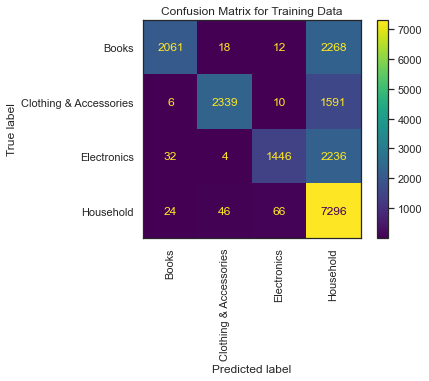

In [346]:
sns.set(style="white")
plot_confusion_matrix(best_grid_rfcl,X_train,Y_train);
plt.title('Confusion Matrix for Training Data')
plt.xticks(rotation=90)
plt.show()

In [347]:
Y_train_predict = best_grid_rfcl.predict(X_train)
model_score = best_grid_rfcl.score(X_train, Y_train)                      ## Accuracy
print('The accuracy of the training model {} \n'.format(model_score)) 
print(metrics.classification_report(Y_train, Y_train_predict))     ## classification_report

The accuracy of the training model 0.6755075815985608 

                        precision    recall  f1-score   support

                 Books       0.97      0.47      0.64      4359
Clothing & Accessories       0.97      0.59      0.74      3946
           Electronics       0.94      0.39      0.55      3718
             Household       0.54      0.98      0.70      7432

              accuracy                           0.68     19455
             macro avg       0.86      0.61      0.66     19455
          weighted avg       0.80      0.68      0.66     19455



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


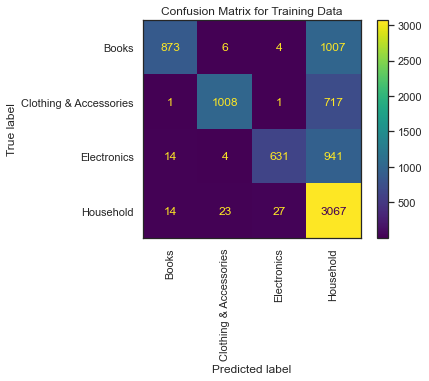

In [348]:
sns.set(style="white")
plot_confusion_matrix(best_grid_rfcl,X_test,Y_test);
plt.title('Confusion Matrix for Training Data')
plt.xticks(rotation=90)
plt.show()

In [349]:
## Performance Matrix on test data set
Y_test_predict = best_grid_rfcl.predict(X_test)
model_score = best_grid_rfcl.score(X_test, Y_test)                    ## Accuracy
print('The accuracy of the test model {} \n'.format(model_score)) 
print(metrics.classification_report(Y_test, Y_test_predict))    ## classification_report

The accuracy of the test model 0.6691053010314224 

                        precision    recall  f1-score   support

                 Books       0.97      0.46      0.63      1890
Clothing & Accessories       0.97      0.58      0.73      1727
           Electronics       0.95      0.40      0.56      1590
             Household       0.54      0.98      0.69      3131

              accuracy                           0.67      8338
             macro avg       0.86      0.61      0.65      8338
          weighted avg       0.80      0.67      0.66      8338



#### Inference:
    
Since hyper parameter tuning of the random forest model on this huge data set is computationally time intesive, we have went with just few values for grid search and the results are not very good. On further tuning of this model , we can obtain better performance metrics

# Conclusion:
    
    As per the above 2 models build, we can see that Gaussian Naive Bayes classifier model delivers better performance metrics than the base random forest model.
    Tuned Random forest model, ada boost model with tuned random forest as base estimator and gradient boost with random forest as base estimator can also be used to train the data, however these are computationally time intensive.

In [353]:
#Naive Bayes performance metrics on train dataset
Y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, Y_train)                      ## Accuracy
print('The accuracy of the training model {} \n'.format(model_score)) 
print(metrics.classification_report(Y_train, Y_train_predict))     ## classification_report

The accuracy of the training model 0.947005911076844 

                        precision    recall  f1-score   support

                 Books       0.96      0.94      0.95      4359
Clothing & Accessories       0.91      1.00      0.95      3946
           Electronics       0.90      0.98      0.94      3718
             Household       0.99      0.91      0.95      7432

              accuracy                           0.95     19455
             macro avg       0.94      0.96      0.95     19455
          weighted avg       0.95      0.95      0.95     19455



In [354]:
#Naive Bayes performance metrics on test dataset
Y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, Y_test)                    ## Accuracy
print('The accuracy of the test model {} \n'.format(model_score)) 
print(metrics.classification_report(Y_test, Y_test_predict))    ## classification_report

The accuracy of the test model 0.9118493643559606 

                        precision    recall  f1-score   support

                 Books       0.93      0.90      0.92      1890
Clothing & Accessories       0.89      0.94      0.92      1727
           Electronics       0.88      0.93      0.90      1590
             Household       0.93      0.90      0.91      3131

              accuracy                           0.91      8338
             macro avg       0.91      0.92      0.91      8338
          weighted avg       0.91      0.91      0.91      8338

